<a href="https://colab.research.google.com/github/miqbalrp/Computational_Physics/blob/Finding_Root/Bisection_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bisection Mehtod

https://miqbalrp.medium.com/mencari-akar-persamaan-menggunakan-python-bisection-method-b2ebf6066752

In [ ]:
def bisection(f, a, b, e=10**-4, N = 100):
  x_a = a
  x_b = b
  
  if f(x_a)*f(x_b) >= 0:
    print("Use another guess range")
    return None
  
  for n in range (1,N):
    x_m = (x_a + x_b)/2
    if abs(f(x_m)) < e:
      return x_m, n
    else:
      if f(x_a)*f(x_m) < 0:
        x_b = x_m
      elif f(x_b)*f(x_m) < 0:
        x_a = x_m
  return x_m, n


f = lambda x: x**3+x**2-3
a = 0.25
b = 1.75

x_root, iteration = bisection(f,a,b)
print('Result : ', x_root)
print('In %d iteration' %iteration)

Result :  1.1745452880859375
In 15 iteration


### Draw Chart

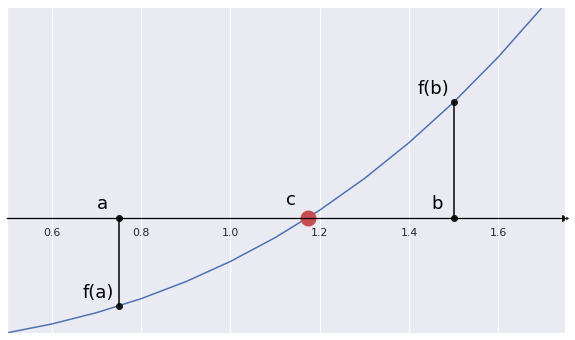

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

f = lambda x: x**3+x**2-3
a = 0.5
b = 1.75
x_a = 0.75
x_b = 1.5
x_c = 1.17455941029298

x = np.arange(a,b,0.1)

fig = plt.figure(figsize=(10,6))
ax  = plt.axes(xlim=(a,b),ylim=(min(f(x)),max(f(x))))

plt.yticks([],[])

ax.spines["bottom"].set_position(("data", 0))
ax.spines["bottom"].set_color('black')
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)

sns.lineplot(x=x, y=f(x))

ax.plot([x_a],[0], 'ko')
ax.plot([x_a],[f(x_a)], 'ko')
ax.plot([x_a,x_a],[0,f(x_a)], 'black')
ax.text(x=x_a-0.05, y=0+0.2, s="a", 
                 color='black', fontsize=18, horizontalalignment='left')
ax.text(x=x_a-0.08, y=f(x_a)+0.2, s="f(a)", 
                 color='black', fontsize=18, horizontalalignment='left')

ax.plot([x_b],[0], 'ko')
ax.plot([x_b],[f(x_b)], 'ko')
ax.plot([x_b,x_b],[0,f(x_b)], 'black')
ax.text(x=x_b-0.05, y=0+0.2, s="b", 
                 color='black', fontsize=18, horizontalalignment='left')
ax.text(x=x_b-0.08, y=f(x_b)+0.2, s="f(b)", 
                 color='black', fontsize=18, horizontalalignment='left')
ax.plot(x_c,f(x_c), 'ro', markersize=15)
ax.text(x=x_c-0.05, y=0+0.3, s="c", 
                 color='black', fontsize=18, horizontalalignment='left')

# plt.savefig('bisection.png', transparent=True)
# from google.colab import files
# files.download('bisection.png')

plt.show()

### Draw Animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
%matplotlib inline
sns.set()

f = lambda x: x**3+x**2-3
a = 0
b = 2
x_a = 0.25
x_b = 1.75
x_m = (x_a + x_b)/2

x = np.arange(a,b,0.1)

fig = plt.figure(figsize=(10,6))
ax  = plt.axes(xlim=(a,b),ylim=(min(f(x)),max(f(x))))

plt.yticks([],[])
ax.spines["bottom"].set_position(("data", 0))
ax.spines["bottom"].set_color('black')
#ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)

sns.lineplot(x=x, y=f(x))

a_dot, = ax.plot([x_a],[f(x_a)], 'yo', markersize=15)
b_dot, = ax.plot([x_b],[f(x_b)], 'go', markersize=15)
m_dot, = ax.plot([x_c],[f(x_c)], 'ro', markersize=15)

ax.legend(['function','a','b','m'])

def bisection_ani(f, a, b, e=10**-4, N = 100): 
  x_a = a
  x_b = b

  if f(x_a)*f(x_b) >= 0:
    return None

  arrx_a = np.array([])
  arrx_b = np.array([])
  arrx_m = np.array([])

  for n in range (1,N):
    x_m = (x_a + x_b)/2
    arrx_a = np.append(arrx_a,x_a)
    arrx_b = np.append(arrx_b,x_b)
    arrx_m = np.append(arrx_m,x_m)
    if abs(f(x_m)) < e:
      return arrx_a, arrx_b, arrx_m
    else:
      if f(x_a)*f(x_m) < 0:
        x_b = x_m
      elif f(x_b)*f(x_m) < 0:
        x_a = x_m
  return arrx_a, arrx_b, arrx_m

arrx_a,arrx_b,arrx_m = bisection_ani(f,x_a,x_b)

def animate(i):
  a_dot.set_data(arrx_a[i],f(arrx_a[i]))
  b_dot.set_data(arrx_b[i],f(arrx_b[i]))
  m_dot.set_data(arrx_m[i],f(arrx_m[i]))
  return a_dot, b_dot, m_dot,

plt.rcParams['animation.html'] = 'html5'
anim = animation.FuncAnimation(fig, animate, frames=len(arrx_a),
                                      blit=False, repeat=True, interval=1000)
plt.close()
anim

# anim.save('bisection.mp4', fps=1, extra_args=['-vcodec', 'libx264'])
# from google.colab import files
# iles.download("bisection.gif")